파이썬 머신러닝 완벽가이드 p.131~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#타이타닉 데이터 로딩
titanic_df = pd.read_csv('../data/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Null 처리 => DataFrame => fillna()
# Age, Cabin, Embarked
# Null 수
np.sum(titanic_df['Age'].isnull()),\
np.sum(titanic_df['Cabin'].isnull()),\
np.sum(titanic_df['Embarked'].isnull())

(177, 687, 2)

In [5]:
titanic_df['Age'].isnull().sum() #이렇게도 가능

177

In [6]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
D              3
              ..
C30            1
A6             1
B78            1
D46            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [8]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Age 컬럼 : 평균값으로 null 채우기
titanic_df['Age'].fillna(
      titanic_df['Age'].mean()
    , inplace=True 
)
titanic_df['Age'].isnull().sum()

0

In [10]:
# Cabin 컬럼 : 특정값'N'으로 null 채우기  (원래는 이렇게 하면 안됨.)
titanic_df['Cabin'].fillna(
    'N'
    ,inplace=True
)
titanic_df['Cabin'].notnull().sum()

891

In [11]:
# Embarked 컬럼: 
titanic_df['Embarked'].fillna(
    'N'
    ,inplace=True
)
titanic_df['Embarked'].notnull().sum()

891

In [12]:
titanic_df['Cabin'][:5]

0       N
1     C85
2       N
3    C123
4       N
Name: Cabin, dtype: object

In [13]:
# Cabin의 구역 추출하기. object를 str으로 변환해서 슬라이싱 => ex) C123 에서 앞 영대문자만 추출.
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 9/22 여기부터
### 시각화

In [25]:
# 성별 생존 여부에 대한 분포(개수)
# groupby -> count
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [35]:
titanic_df.groupby(['Sex','Survived'])['Age'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Age, dtype: int64

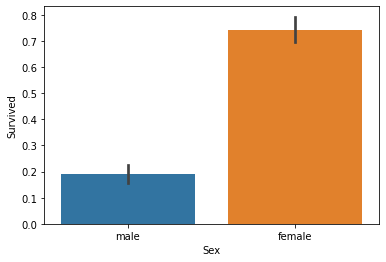

In [37]:
# sns barplot
# 성별 생존율 시각화하기
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.show()
# 생존율 => 남: 18.8%, 여: 74.2%

In [43]:
titanic_df[['Pclass','Fare']].sort_values(by='Fare', ascending=False)

,Pclass,Fare
258,1,512.3292
737,1,512.3292
679,1,512.3292
88,1,263.0000
27,1,263.0000
...,...,...
633,1,0.0000
413,2,0.0000
822,1,0.0000
732,2,0.0000


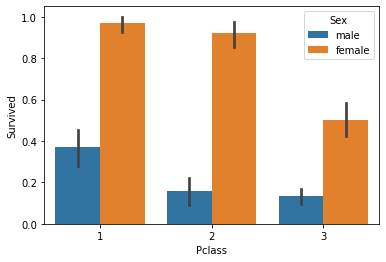

In [44]:
sns.barplot(
      x = 'Pclass'
    , y = 'Survived'
    , hue ='Sex'
    , data = titanic_df
)
plt.show()

In [52]:
# 입력한 나이값으로 구간값을 대입하는 함수생성 (나이의 범위별 카테고리화)

def get_cate(age):
    cate=''
    if age <= -1 : cate="Unknown"
    elif age <=5 : cate='Baby'
    elif age <=12 : cate='Child'
    elif age <=18 : cate='Teenager'
    elif age <=25 : cate='Student'
    elif age <=35 : cate='Young Adult'
    elif age <=60 : cate='Adult'
    else: cate='Elderly'
    
    return cate

In [65]:
# X축의 값을 순차적으로 표시하기 위한 설정 값 세팅
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cate']= titanic_df['Age'].apply(lambda x:get_cate(x))
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student


In [66]:
titanic_df[['Age','Age_cate']][:5]

,Age,Age_cate
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


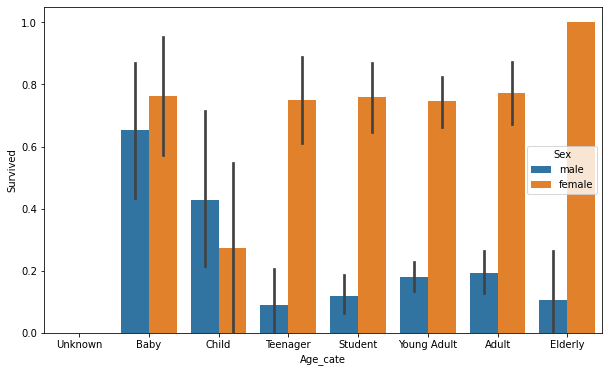

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Age_cate'
    ,y='Survived'
    ,hue='Sex'
    ,data= titanic_df
    ,order=group_names
)

### 숫자로 인코딩( 항목 : Cabin, Sex, Embarked)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [70]:
def encode_features(dataDF):
    '''dataDF : 입력 데이터프레임'''
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

In [71]:
titanic_df = encode_features(titanic_df)
titanic_df.head()
# Cabin, Sex, Embarked 가 모두 숫자 형태로 바뀌었다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


### 완성 코드

In [72]:
# Age, Cabin, Embarked, Fare의 Null 처리 함수
def fillna_(df):
    '''Age=> mean()'''
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    '''Cabin=> 'N' '''
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

In [78]:
# 불필요한 컬럼 제거 함수
def drop_feature(df): 
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [80]:
# Cabin, Sex, Embarked 레이블 인코딩 함수
# Cabin : C85 => C => 레이블 인코딩 진행 필요
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1] # Cabin: C85 =>
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
        
    return df

In [81]:
# 앞에서 선언한 함수를 다 적용하는 함수
def transform_features(df):
    df= fillna_(df)
    df= drop_feature(df)
    df= format_features(df)
    return df

### 머신러닝 알고리즘 실행

In [87]:
# 타이타닉 원본 데이터 다시 불러오기
titanic_df = pd.read_csv('../data/titanic_train.csv')
titanic_df.head(3)

# 답 추출
y_tit_df = titanic_df['Survived']

# 답을 빼고 데이터 추출
X_tit_df = titanic_df.drop('Survived',axis=1, inplace=False)

# 데이터 정리() : 위에서 만든 함수 적용하기
X_tit_df = transform_features(X_tit_df)

In [103]:
# 모델 생성
# 1. 학습 데이터, 테스트데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= \
train_test_split(
      X_tit_df  # 분리할 데이터
    , y_tit_df  # 분리할 답
    , test_size=0.2 # 테스트 데이터 크기
    , random_state=19
)

#### 머신 러닝 알고리즘에 적용 
- 3개 교차학습 방법 적용: KFold, StratifiedKfold(cross_val_score), GridSearchCV

#### 지도 학습(답이 존재함:Survived 컬럼), 분류알고리즘(사느냐, 죽느냐)
- 분류문제용 알고리즘 3개 돌려보기 : DecisionTreeClassifier, RandomForestClassifier, LogisticRegression

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# 분류문제 => 1차적인 평가지표 : 정확도(Accuracy)
from sklearn.metrics import accuracy_score

# 위 알고리즘의 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# 1. DecisionTreeClassifier 모델의 정확도 출력
# 학습진행 => 학습한 모델 생성됨
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test) # 테스트 데이터 입력하고 예측값 추출
print('dt_clf 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 2. RandomForestClassfier 모델의 정확도 출력
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('rf_clf 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 3. LogisticRegression 모델의 정확도 출력
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('lr_pred 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

dt_clf 정확도 : 0.7877
rf_clf 정확도: 0.8547
lr_pred 정확도 : 0.8492


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# kfold 해보기: 숙제

In [97]:
# StratifiedKfold(cross_val_score) 교차검증 
# 1. dt_clf
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
      dt_clf       # 적용할 알고리즘
    , X_tit_df     # 학습할 데이터
    , y_tit_df    # 학습할 답
    , cv=5    # Kfold(split할 숫자)
)

for n, accu in enumerate(scores):
    out_str = '교차검증 {0} 정확도: {1:.4f}'
    print(out_str.format(n, accu))
    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))
    

교차검증 0 정확도: 0.7430
평균 정확도 : 0.7879
교차검증 1 정확도: 0.7753
평균 정확도 : 0.7879
교차검증 2 정확도: 0.7921
평균 정확도 : 0.7879
교차검증 3 정확도: 0.7865
평균 정확도 : 0.7879
교차검증 4 정확도: 0.8427
평균 정확도 : 0.7879


In [94]:
# StratifiedKfold(cross_val_score) 교차검증
# 2. rf_clf
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
      rf_clf       # 적용할 알고리즘
    , X_tit_df     # 학습할 데이터
    , y_tit_df    # 학습할 답
    , cv=5    # Kfold(split할 숫자)
)

for n, accu in enumerate(scores):
    out_str = '교차검증 {0} 정확도: {1:.4f}'
    print(out_str.format(n, accu))
    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))
    

교차검증 0 정확도: 0.7933
평균 정확도 : 0.8137
교차검증 1 정확도: 0.7978
평균 정확도 : 0.8137
교차검증 2 정확도: 0.8483
평균 정확도 : 0.8137
교차검증 3 정확도: 0.7640
평균 정확도 : 0.8137
교차검증 4 정확도: 0.8652
평균 정확도 : 0.8137


In [95]:
# StratifiedKfold(cross_val_score) 교차검증
# 3. lr_clf
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
      lr_clf       # 적용할 알고리즘
    , X_tit_df     # 학습할 데이터
    , y_tit_df    # 학습할 답
    , cv=5    # Kfold(split할 숫자)
)

for n, accu in enumerate(scores):
    out_str = '교차검증 {0} 정확도: {1:.4f}'
    print(out_str.format(n, accu))
    print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))
    

교차검증 0 정확도: 0.7989
평균 정확도 : 0.7845
교차검증 1 정확도: 0.7697
평균 정확도 : 0.7845
교차검증 2 정확도: 0.7809
평균 정확도 : 0.7845
교차검증 3 정확도: 0.7753
평균 정확도 : 0.7845
교차검증 4 정확도: 0.7978
평균 정확도 : 0.7845


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [100]:
### StratifiedKfold(cross_val_score) 교차검증
### for 문으로 한번에 돌리기
from sklearn.model_selection import cross_val_score

al_name=[dt_clf, rf_clf, lr_clf]

for al in al_name:
    scores = cross_val_score(
        al       # 적용할 알고리즘
    , X_tit_df     # 학습할 데이터
    , y_tit_df    # 학습할 답
    , cv=5    # Kfold(split할 숫자)
)
    print(al)
    for n, accu in enumerate(scores):
        out_str = '교차검증 {0} 정확도: {1:.4f}'
        print(out_str.format(n, accu))
        print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

DecisionTreeClassifier(random_state=11)
교차검증 0 정확도: 0.7430
평균 정확도 : 0.7879
교차검증 1 정확도: 0.7753
평균 정확도 : 0.7879
교차검증 2 정확도: 0.7921
평균 정확도 : 0.7879
교차검증 3 정확도: 0.7865
평균 정확도 : 0.7879
교차검증 4 정확도: 0.8427
평균 정확도 : 0.7879
RandomForestClassifier(random_state=11)
교차검증 0 정확도: 0.7933
평균 정확도 : 0.8137
교차검증 1 정확도: 0.7978
평균 정확도 : 0.8137
교차검증 2 정확도: 0.8483
평균 정확도 : 0.8137
교차검증 3 정확도: 0.7640
평균 정확도 : 0.8137
교차검증 4 정확도: 0.8652
평균 정확도 : 0.8137
LogisticRegression()
교차검증 0 정확도: 0.7989
평균 정확도 : 0.7845
교차검증 1 정확도: 0.7697
평균 정확도 : 0.7845
교차검증 2 정확도: 0.7809
평균 정확도 : 0.7845
교차검증 3 정확도: 0.7753
평균 정확도 : 0.7845
교차검증 4 정확도: 0.7978
평균 정확도 : 0.7845


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

In [114]:
# GridSearchCV : 베스트 파라미터 찾기
# 1. DecisionTreeClassifier 사용

from sklearn.model_selection import GridSearchCV

# grid에 넣을 파라미터 저장 (이 파라미터 구조는 적용알고리즘 마다 상이하므로 확인 필요, 같은 트리계열 등은 파라미터 비슷함)
# 즉 알고리즘 마다 인풋되는 파라미터 구조가 다를수 있으므로, GridSearch에서 알고리즘별 for문으로 반복적용은 불가함
grid_param = {
    'max_depth':[2,3,5,10]  # 4개
    ,'min_samples_split': [2,3,5]  # 3개
    ,'min_samples_leaf' : [1,5,8]  # 3개
}  # 각각 다른 경우로 4*3*3 =36번 수행됨.

# 36 * 5(폴드 세트 수) 총 180번 학습시켜서 베스트 파라미터 찾기
grid_dclf= GridSearchCV(
      dt_clf  # 적용할 알고리즘
    , param_grid=grid_param  # 적용할 파라미터 딕셔너리
    , scoring='accuracy'   # 적용할 성능평가지표(여기서는 정확도 적용)
    , cv=5  # 적용할 교차검증
)

# 베스트 찾기
grid_dclf.fit(X_train, y_train)

print('베스트 파라미터 : ', grid_dclf.best_params_)
print('베스트 정확도 : ', grid_dclf.best_score_)

# 여기까지 베스트 모델 찾기 위한 것.

# 베스트 모델 => 예측 + 평가
best_dclf = grid_dclf.best_estimator_

# 테스트 데이터 입력해서 예측값 추출
dpred = best_dclf.predict(X_test)

# 예측값과 원래답을 비교 => 정확도 추출
accu = accuracy_score(y_test, dpred)
print('최종 정확도 :{0:.4f} '.format(accu))


베스트 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
베스트 정확도 :  0.7991825076332119
최종 정확도 :0.8715 
